In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from QuickSort import quick_sort
from HeapSort import heap_sort
from MergeSort import merge_sort
import numpy as np
import gen_data
import time 

### Preparing Dataset

In [37]:
n = 10
p = 1000000
threshold = 1e9
data_set = gen_data.gen(n, p, threshold)

### QuickSort

In [38]:
array_list = data_set

qs_times = []

for array in array_list:
    start = time.perf_counter()
    quick_sort(array, 0, p - 1)
    end = time.perf_counter()
    qs_times.append((end - start) * 1000)

### HeapSort

In [39]:
array_list = data_set

hs_times = []

for array in array_list:
    start = time.perf_counter()
    heap_sort(array, p)
    end = time.perf_counter()
    hs_times.append((end - start) * 1000)

### MergeSort 

In [40]:
array_list = data_set

ms_times = []

for array in array_list:
    start = time.perf_counter()
    merge_sort(array, 0, p - 1)
    end = time.perf_counter()
    ms_times.append((end - start) * 1000)

### Python Sort (NumPy)

In [41]:
array_list = data_set

ns_times = []

for array in array_list:
    start = time.perf_counter()
    array = np.sort(array)
    end = time.perf_counter()
    ns_times.append((end - start) * 1000)

In [42]:
from docx import Document
from docx.shared import Inches


data = {
    "QuickSort": qs_times, 
    "HeapSort": hs_times,
    "MergeSort": ms_times,
    "NumPy Sort": ns_times
}

doc = Document()
doc.add_heading('Báo cáo kết quả thử nghiệm', 0)


table = doc.add_table(rows=1, cols=5)
table.style = 'Table Grid' 

hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Dữ liệu'
hdr_cells[1].text = 'QuickSort (ms)'
hdr_cells[2].text = 'HeapSort (ms)'
hdr_cells[3].text = 'MergeSort (ms)'
hdr_cells[4].text = 'NumPy Sort (ms)'

for i in range(10):
    row_cells = table.add_row().cells
    row_cells[0].text = str(i + 1) # Cột STT
    row_cells[1].text = f"{data['QuickSort'][i]:.2f}"
    row_cells[2].text = f"{data['HeapSort'][i]:.2f}"
    row_cells[3].text = f"{data['MergeSort'][i]:.2f}"
    row_cells[4].text = f"{data['NumPy Sort'][i]:.2f}"

avg_row = table.add_row().cells
avg_row[0].text = 'Trung bình'
avg_row[1].text = f"{sum(data['QuickSort'])/10:.2f}"
avg_row[2].text = f"{sum(data['HeapSort'])/10:.2f}"
avg_row[3].text = f"{sum(data['MergeSort'])/10:.2f}"
avg_row[4].text = f"{sum(data['NumPy Sort'])/10:.2f}"

doc.save('Ket_qua_thu_nghiem.docx')
print("Đã xuất file thành công!")

Đã xuất file thành công!


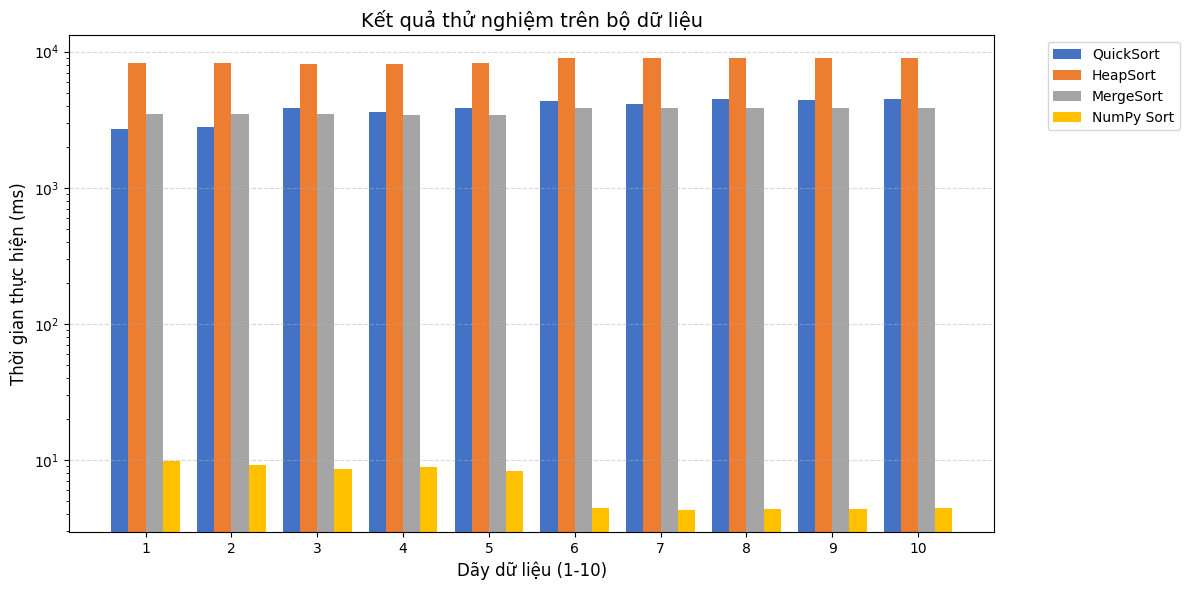

In [49]:
import matplotlib.pyplot as plt
import numpy as np

labels = np.arange(1, 11)
width = 0.2 

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(labels - 1.5*width, qs_times, width, label='QuickSort', color='#4472C4')
rects2 = ax.bar(labels - 0.5*width, hs_times, width, label='HeapSort', color='#ED7D31')
rects3 = ax.bar(labels + 0.5*width, ms_times, width, label='MergeSort', color='#A5A5A5')
rects4 = ax.bar(labels + 1.5*width, ns_times, width, label='NumPy Sort', color='#FFC000')

ax.set_xlabel('Dãy dữ liệu (1-10)', fontsize=12)
ax.set_ylabel('Thời gian thực hiện (ms)', fontsize=12)
ax.set_title('Kết quả thử nghiệm trên bộ dữ liệu', fontsize=14)
ax.set_xticks(labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_yscale('log')

plt.tight_layout()
plt.show()